
Erklärte Varianz pro Hauptkomponente: [0.25744716 0.10729234 0.10010696 0.0929951  0.07232486 0.05801199
 0.05438279 0.04819378 0.04482855 0.03872003]
Summe der erklärten Varianz: 0.87


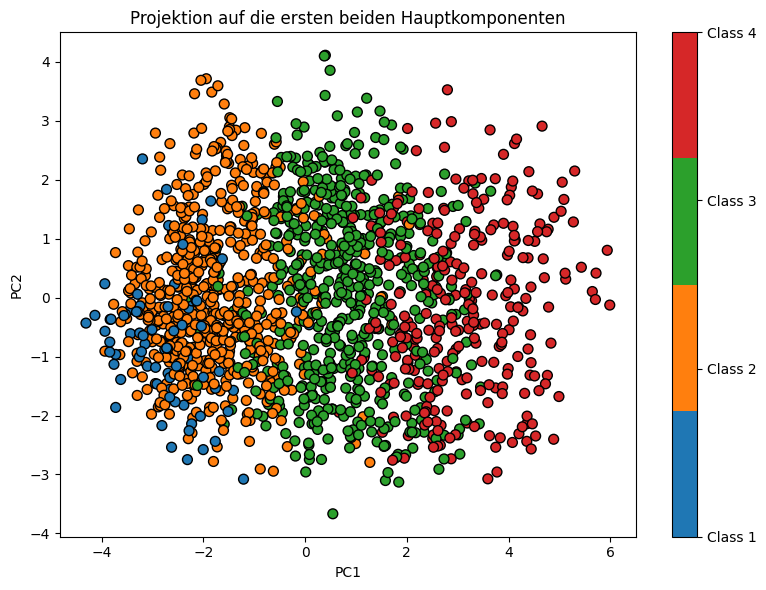

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Daten laden
file_path = r"C:\Users\doria\OneDrive\Dokumente\HFT\Digitale Prozesse und Technologien\1. Semester\Data Analytics\Obesity_Dataset_FE.xlsx"
data = pd.read_excel(file_path)

# Zielvariable (Class) extrahieren und in numerische Kategorien umwandeln
data["Class"] = data["Class"].astype('category').cat.codes

# Beschränkung auf maximal 4 Klassen (optional, falls notwendig)
max_classes = 4
data["Class"] = data["Class"].apply(lambda x: x if x < max_classes else max_classes - 1)

# Auswahl numerischer Merkmale
features = data.select_dtypes(include=["float", "int"]).drop(columns=["Class"])

# PCA-Pipeline erstellen
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Daten skalieren
    ('pca', PCA(n_components=0.85))  # PCA mit 85% erklärter Varianz
])

# Pipeline anwenden
reduced_data = pipeline.fit_transform(features)

# Erklärte Varianzanteile ausgeben
pca = pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_
print(f"\nErklärte Varianz pro Hauptkomponente: {explained_variance}")
print(f"Summe der erklärten Varianz: {explained_variance.sum():.2f}")

# Projektion auf die ersten beiden Hauptkomponenten für Visualisierung
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(reduced_data.shape[1])])

# Scatter-Plot der ersten beiden Hauptkomponenten
plt.figure(figsize=(8, 6))
cmap = ListedColormap(plt.cm.tab10.colors[:max_classes])

scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data["Class"], cmap=cmap, edgecolor='k', s=50)
plt.title("Projektion auf die ersten beiden Hauptkomponenten")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Farbbar mit Klassenlabels
class_labels = [f"Class {i+1}" for i in range(max_classes)]
cbar = plt.colorbar(scatter)
cbar.set_ticks(range(max_classes))
cbar.set_ticklabels(class_labels)

plt.tight_layout()
plt.show()

